In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
main = pd.read_csv('/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025_09_10_DB_100Bins_Merged.csv')

In [4]:
main.head()

,structure_name,pressure_bar,temperature_kelvin,volume_kubAng,density_Atmos_per_kubAng,fraction_of_used_points,beladung_mol_per_kg,beladung_atoms,mass,0,...,90,91,92,93,94,95,96,97,98,99
0,EON,0.1,300.0,3563.018109,104.297410,0.097290,0.393229,1.417593,5.9862599425523885e-21 g,0,...,112,112,88,80,24,24,48,56,48,24
1,EON,1.0,300.0,3563.018109,369.533830,0.097290,1.393240,5.022643,5.9862599425523885e-21 g,0,...,112,112,88,80,24,24,48,56,48,24
2,EON,0.1,325.0,3563.018109,50.926900,0.098419,0.192008,0.692190,5.9862599425523885e-21 g,0,...,176,104,64,40,48,64,48,32,48,64
3,EON,1.0,325.0,3563.018109,275.559223,0.098419,1.038931,3.745356,5.9862599425523885e-21 g,0,...,176,104,64,40,48,64,48,32,48,64
4,EON,0.1,350.0,3563.018109,26.492118,0.099060,0.099882,0.360077,5.9862599425523885e-21 g,0,...,128,80,48,56,96,24,56,80,48,40


In [9]:
# Shit Mergen

# CSVs laden
main = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025_09_10_DB_100Bins_BestData.csv")
features = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_raw.csv")

# Bin-Spalten bestimmen (0–99 als Strings)
bin_cols = [str(i) for i in range(100)]

# Neuen Index nach Struktur + Temperatur setzen
features_indexed = features.set_index(["structure_name", "temperature_kelvin"])

# Nur die Bin-Spalten in main überschreiben
main.set_index(["structure_name", "temperature_kelvin"], inplace=True)
main.loc[:, bin_cols] = features_indexed[bin_cols]

# Index zurücksetzen
main.reset_index(inplace=True)

# Speichern
main.to_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025-09-26_DB_100Bins_features_raw.csv", index=False)

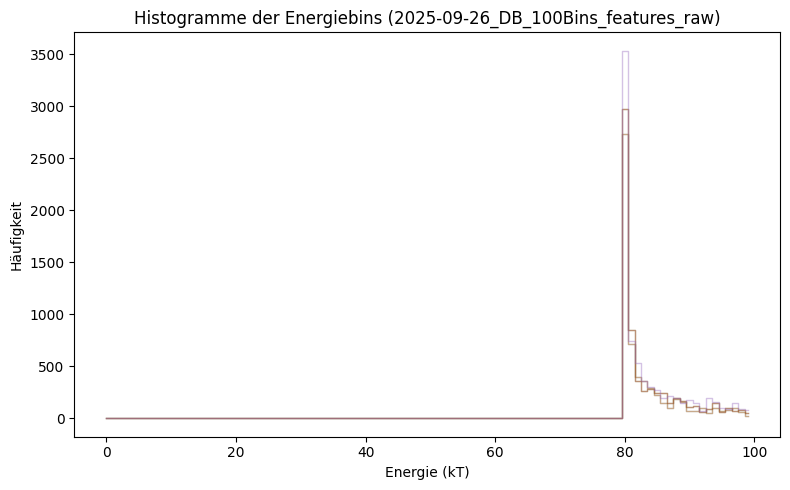

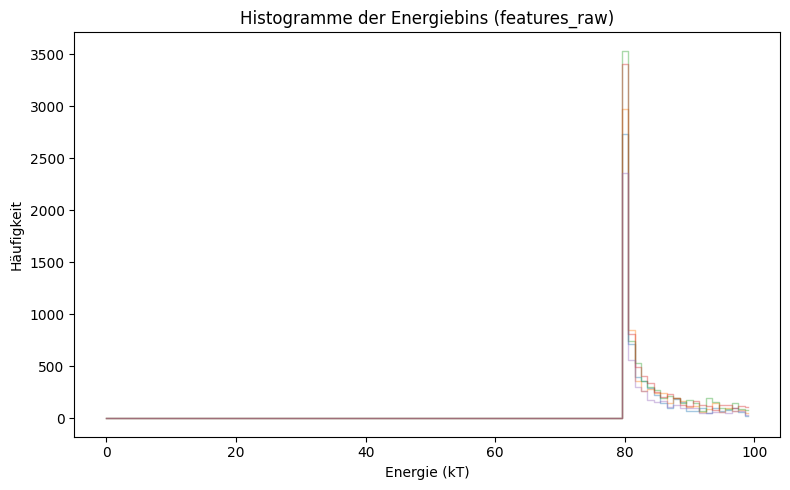

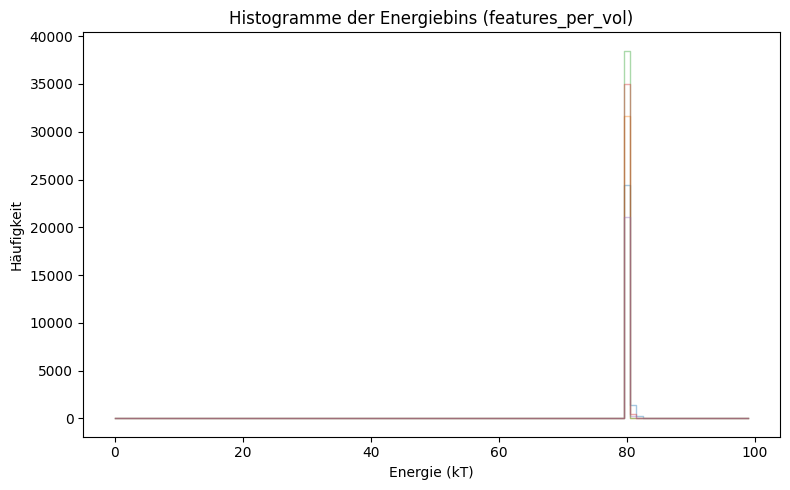

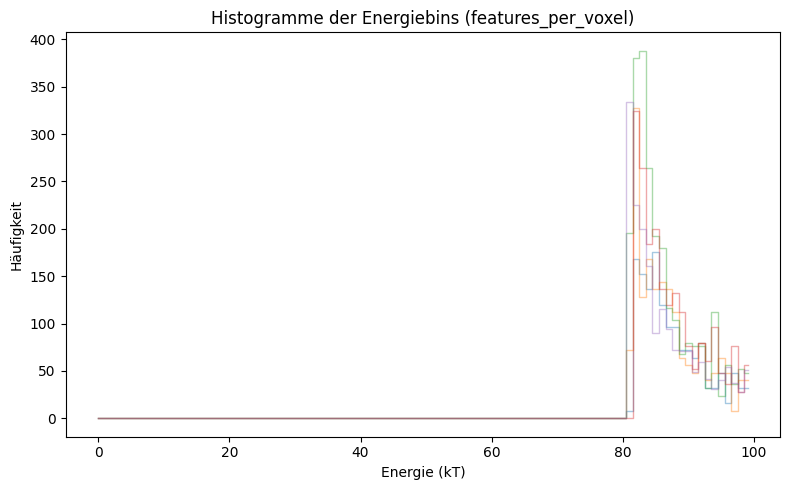

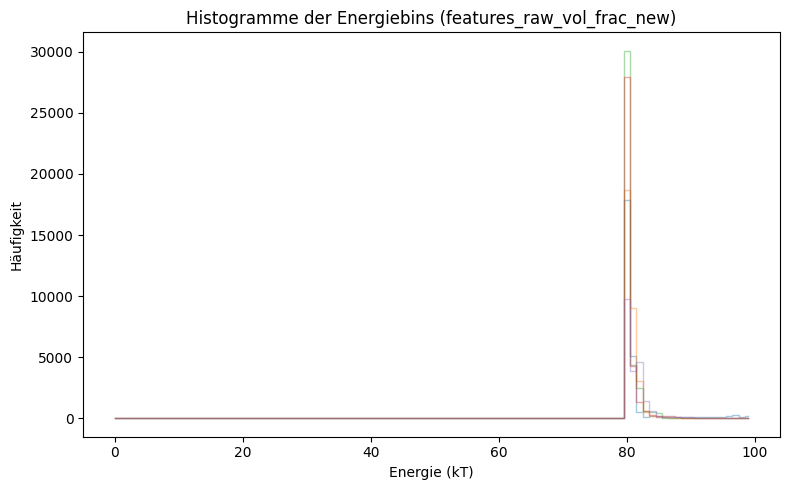

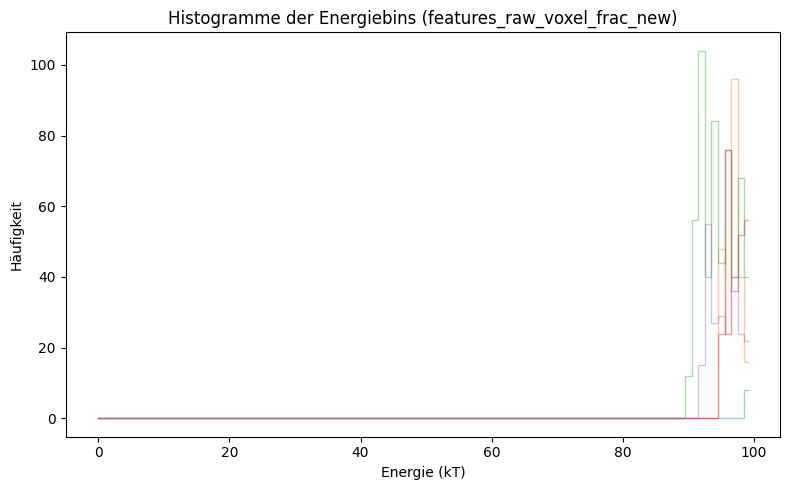

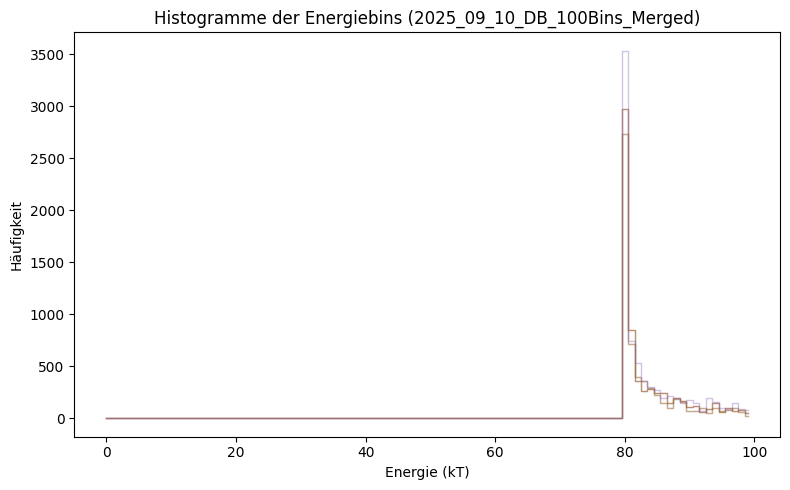

In [14]:
# Shit Plotten
import os

def is_number(s):
    """Hilfsfunktion: prüft, ob String Zahl ist."""
    try:
        float(s)
        return True
    except ValueError:
        return False


def plot_csv123(file, condition=None, head=None, save=False):
    """
    Liest CSV-Datei ein und plottet Features.
    :param file: Pfad zur CSV
    :param condition: dict, z.B. {"temperature_kelvin": 400}
    :param head: int, falls man nur Kopfzeilen nehmen will
    :param save: True = als PNG speichern, False = nur anzeigen
    """
    df = pd.read_csv(file)

    # Filter anwenden, falls angegeben
    if condition:
        for col, val in condition.items():
            df = df[df[col] == val]

    if head:
        df = df.head(head)

    # Feature-Spalten (= Zahlen als Spaltenname) bestimmen
    feature_columns = [col for col in df.columns if is_number(col)]
    bin_edges = [float(c) for c in feature_columns]

    # Plot erstellen
    plt.figure(figsize=(8, 5))
    for idx, row in df[feature_columns].iterrows():
        plt.plot(bin_edges, row.values, alpha=0.4, lw=1)

    base = os.path.splitext(os.path.basename(file))[0]
    plt.title(f"Histogramme der Features ({base})")
    plt.xlabel("Bins")
    plt.ylabel("Häufigkeit")
    plt.tight_layout()

    if save:
        plt.savefig(f"{base}_plot.png", dpi=300)
        plt.close()
    else:
        plt.show()


def plot_csv(file, condition=None, head=None, save=False):
    df = pd.read_csv(file)

    # Filter anwenden
    if condition:
        for col, val in condition.items():
            if col in df.columns:
                df = df[df[col] == val]

    if head:
        df = df.head(head)

    # Feature-Spalten (= numerische Spaltennamen = Energiebins)
    feature_columns = [col for col in df.columns if is_number(col)]
    # Nach Zahlenwert sortieren, aber Strings behalten
    sorted_feature_cols = sorted(feature_columns, key=lambda c: float(c))
    bin_edges = [float(c) for c in sorted_feature_cols]

    plt.figure(figsize=(8, 5))
    for _, row in df[sorted_feature_cols].iterrows():
        plt.step(bin_edges, row.values, where="mid", alpha=0.4, lw=1)

    base = os.path.splitext(os.path.basename(file))[0]
    plt.title(f"Histogramme der Energiebins ({base})")
    plt.xlabel("Energie (kT)")
    plt.ylabel("Häufigkeit")
    plt.tight_layout()

    if save:
        plt.savefig(f"{base}_hist.png", dpi=300)
        plt.close()
    else:
        plt.show()


# ---- Hier CSVs angeben ----
csv_files = [
    "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025-09-26_DB_100Bins_features_raw.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_raw.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_per_vol.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_per_voxel.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_raw_vol_frac_new.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_raw_voxel_frac_new.csv",
    #"/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025_09_10_DB_100Bins_Merged.csv"
]

# Beispielaufrufe
for f in csv_files:
    if "voxel" in f:
        plot_csv(f, condition={"temperature_kelvin": 400}, head=5, save=False)
    else:
        plot_csv(f, condition={"temperature_kelvin": 400}, head=5, save=False)

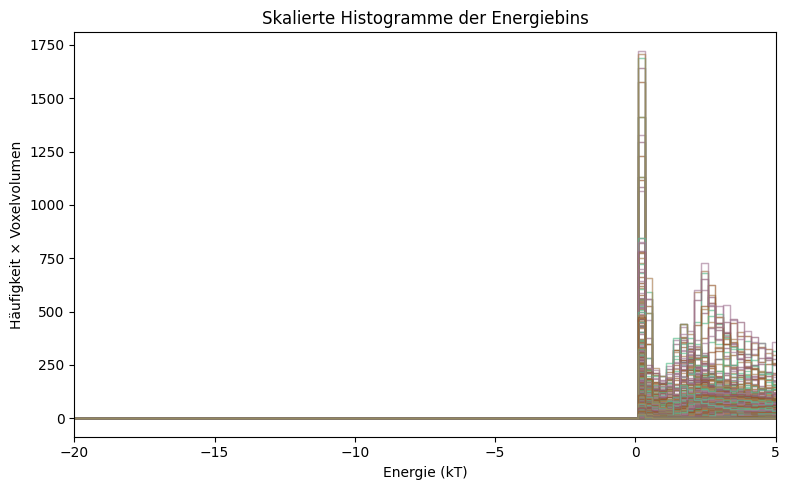

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
main = pd.read_csv(
    "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/2025-09-26_DB_100Bins_features_raw.csv"
)

# Feature-Spalten (0–99 als Strings)
feature_cols = [str(i) for i in range(100)]

# voxel volume pro Zeile berechnen und Features skalieren
voxel_vol = main["volume_kubAng"] / (64**3)
main[feature_cols] = main[feature_cols].multiply(voxel_vol, axis=0)

main.to_csv("/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/testtesttesttesttetstetse.csv", index=False)

# x-Achse = Energiewerte (sortierte Spaltennamen als float)
sorted_feature_cols = sorted(feature_cols, key=lambda c: float(c))

bin_edges = np.linspace(-20, 5, 100)

plt.figure(figsize=(8, 5))
for _, row in main[sorted_feature_cols].iterrows():
    plt.step(bin_edges, row.values, where="mid", alpha=0.4, lw=1)

plt.xlabel("Energie (kT)")
plt.ylabel("Häufigkeit × Voxelvolumen")
plt.title("Skalierte Histogramme der Energiebins")

# Nur Teilbereich anzeigen, z. B. -10 bis 0
plt.xlim(-20, 5)

plt.tight_layout()
plt.show()



In [41]:
# Einfach in einer Jupyter-Zelle laufen lassen

import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== Einstellungen =====
CSV_GLOB       = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_expV_vergleich3.csv"  # z.B. "data/*.csv"
STRUCT_FILTER  = "OKO"        # z.B. "RWY" oder None für alle
TEMP_FILTER    = 500        # z.B. 500.0 oder None für alle
AGG            = None       # "sum" oder "mean" über die gefilterten Zeilen
# =========================

# CSVs laden
paths = sorted(glob.glob(CSV_GLOB))
if not paths:
    raise SystemExit(f"Keine Dateien gefunden für Muster: {CSV_GLOB}")

df = pd.concat((pd.read_csv(p) for p in paths), ignore_index=True)

# Bin-Spalten erkennen (rein numerische Spaltennamen)
bin_cols = sorted([c for c in df.columns if str(c).isdigit()], key=lambda x: int(x))
if not bin_cols:
    raise SystemExit("Keine Bin-Spalten (z. B. '0'..'99') in den Dateien gefunden.")

# Optional filtern
if STRUCT_FILTER is not None and "structure_name" in df.columns:
    df = df[df["structure_name"] == STRUCT_FILTER]

if TEMP_FILTER is not None and "temperature_kelvin" in df.columns:
    df = df[df["temperature_kelvin"] == TEMP_FILTER]

if df.empty:
    raise SystemExit("Nach dem Filter ist kein Datensatz übrig.")

# Aggregation über die gefilterten Zeilen
if AGG == "mean":
    y = df[bin_cols].mean(axis=0).to_numpy()
else:
    y = df[bin_cols].sum(axis=0).to_numpy()

# x-Achse: numerische Bin-Indizes
x = np.array([int(c) for c in bin_cols])

# Plot im Notebook (kein Speichern)
plt.figure()
plt.plot(x, y)
subtitle = []
if STRUCT_FILTER is not None: subtitle.append(f"structure_name={STRUCT_FILTER}")
if TEMP_FILTER   is not None: subtitle.append(f"T={TEMP_FILTER} K")
plt.title("Bin-Inhalte " + (" | ".join(subtitle) if subtitle else "(alle Daten)"))
plt.xlabel("Bin")
plt.ylabel("Wert (" + ("Summe" if AGG=="sum" else "Mittel") + ")")
plt.grid(True, alpha=0.3)
plt.show()



SystemExit: Keine Bin-Spalten (z. B. '0'..'99') in den Dateien gefunden.

/Users/danielbock/MASTERTHESIS/MASTA/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


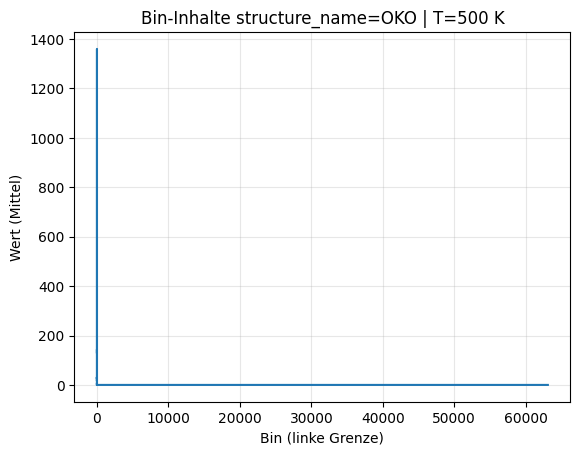

In [51]:
# Einfach in einer Jupyter-Zelle laufen lassen

import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== Einstellungen =====
CSV_GLOB       = "/Users/danielbock/MASTERTHESIS/MASTA/DataArchiv/features_rawV_vergleich_log.csv"  # z.B. "data/*.csv"
STRUCT_FILTER  = "OKO"        # z.B. "RWY" oder None für alle
TEMP_FILTER    = 500          # z.B. 500.0 oder None für alle
AGG            = None         # "sum" oder "mean" über die gefilterten Zeilen
# =========================

# CSVs laden
paths = sorted(glob.glob(CSV_GLOB))
if not paths:
    raise SystemExit(f"Keine Dateien gefunden für Muster: {CSV_GLOB}")

df = pd.concat((pd.read_csv(p) for p in paths), ignore_index=True)

# Bin-Spalten erkennen (beginnen mit "[" wegen Intervall-Notation)
bin_cols = [c for c in df.columns if str(c).startswith("[")]
if not bin_cols:
    raise SystemExit("Keine Bin-Spalten (z. B. '[..,..)') in den Dateien gefunden.")

# Bins nach linker Grenze sortieren
def parse_left_edge(label):
    # Beispiel: "[-15.00, -14.80)" → -15.00
    match = re.match(r"\[([-\d\.]+),", label)
    return float(match.group(1)) if match else np.nan

bin_cols_sorted = sorted(bin_cols, key=parse_left_edge)

# Optional filtern
if STRUCT_FILTER is not None and "structure_name" in df.columns:
    df = df[df["structure_name"] == STRUCT_FILTER]

if TEMP_FILTER is not None and "temperature_kelvin" in df.columns:
    df = df[df["temperature_kelvin"] == TEMP_FILTER]

if df.empty:
    raise SystemExit("Nach dem Filter ist kein Datensatz übrig.")

# Aggregation über die gefilterten Zeilen
if AGG == "mean":
    y = df[bin_cols_sorted].mean(axis=0).to_numpy()
else:
    y = df[bin_cols_sorted].sum(axis=0).to_numpy()

# x-Achse: linke Grenzen der Intervalle
x = np.array([parse_left_edge(c) for c in bin_cols_sorted])

# Plot im Notebook (kein Speichern)
plt.figure()
plt.plot(x, y)
subtitle = []
if STRUCT_FILTER is not None: subtitle.append(f"structure_name={STRUCT_FILTER}")
if TEMP_FILTER   is not None: subtitle.append(f"T={TEMP_FILTER} K")
plt.title("Bin-Inhalte " + (" | ".join(subtitle) if subtitle else "(alle Daten)"))
plt.xlabel("Bin (linke Grenze)")
plt.ylabel("Wert (" + ("Summe" if AGG=="sum" else "Mittel") + ")")
plt.grid(True, alpha=0.3)
plt.show()
